# Numerical Computing: Homework 1

###### Authors:

* alberto.suarez@uam.es
* Student 1: Andrés Teruel Fernández

In [1]:
import math
import scipy as sp
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

### Exercise 1.

The precision and magnitude of the numbers that can be represented and manipulated in a computer depend on the environment in which the operations are performed. For real numbers, **double precision** is commonly used.

1. The goal of this exercise is to determine, using a systematic search procedure, the largest and the smallest positive (different from zero) values that can be represented in the following environments:
    1. Excel (without using *Visual Basic*).
    2. Python.
    
2. Provide an explanation of the results obtained.

<u>HINTS</u>: 
1. Use a *while* loop
2. Try to understand the information provided by `print(sys.float_info)`.

In [2]:
# Find the largest power of 2 we can represent
max_real = 1.0
aux = 1.0
exp = 0

while not np.isinf(aux):
    exp += 1
    max_real = aux
    aux *= 2.0

# We can find exp is 1024 as confirmed by sys.float_info.max_exp

# After finding the largest power of 2 representable, we look for the largest
# mantissa in base 2 we can multiply 2**1024 by
aux = max_real
exp = exp - 53

while not np.isinf(aux):
    max_real = aux
    aux += 2**exp
    exp += 1

print(f"sys.float_info.max={sys.float_info.max}")
print(f"max_real={max_real}")
print(f"Equal: {sys.float_info.max == max_real}")

sys.float_info.max=1.7976931348623157e+308
max_real=1.7976931348623157e+308
Equal: True


In [3]:
# Compute the smallest positive double precision value. 
min_real = None
aux = 1.0
exp = 0

# Find the smallest power of 2 that can be represented
while aux != 0:
    min_real = aux
    exp = exp - 1
    aux = 2.0**exp

# The answer is stored in the variable min_real.
print(f"sys.float_info.min={sys.float_info.min}")
print(f"math.ulp(0.0)={math.ulp(0.0)}")
print(f"min_real={min_real}")

sys.float_info.min=2.2250738585072014e-308
math.ulp(0.0)=5e-324
min_real=5e-324


__EXPLICACIÓN__

- Para encontrar el positivo de doble precisión más grande que se pueda representar en Python, primero encontramos la potencia de 2 más grande que no haga *overflow* (en este caso es 2**1024, como nos confirma *sys.float_info.max_exp*). Para finalizar maximizamos la mantisa de forma que vamos sumando potencias de dos ascendentes al número hasta que haga *overflow*.

    Para la búsqueda de la mantissa, en teoría podemos buscar solo entre el dígito 309 hasta el 292 ya que la mantisa está limitada a 16 dígitos en base 10 (pese a que *sys.float_info.dig* indica que son 15 los que se pueden representar fielmente, 16 es el máximo). Pese a este detalle, se iteran los 309 dígitos puesto que no supone una carga computacional alta.

    Cuando comparamos nuestro resultado vemos que obtenemos el mismo valor.

- Para encontrar el positivo de doble precisión más pequeño que se pueda representar en Python, encontraremos la potencia de 2 más pequeña que no haga *underflow*.

    En este ejercicio encontramos un valor inesperado, ya que según *sys.float_info.min* el número positivo en coma flotante normalizado más pequeño es 2.2250738585072014e-308, pero nuestro resultado es min_real=5e-324 que claramente es más pequeño.

    Tras investigar un poco, encontramos que el número positivo en coma flotante no-normalizado más pequeño posible es math.ulp(0.0)=5e-324, confirmando nuestro resultado.

---

### Exercise 2.

Due to rounding errors, in double precision there is a quantity **sys.float_info.epsilon** such that 

```
(1.0 + sys.float_info.epsilon) == 1.0
# False (the values compared are different)
 
(1.0 + sys.float_info.epsilon/2.0) == 1.0
# True (the values compared are equal)
```
1. Determine the largest values of *small-values* such that

```
(1.0 + small_values[0]) == 1.0
# True (the values compared are equal)

(1048576.0 + small_values[1]) == 1048576.0
# True (the values compared are equal)

(0.0009765625 + small_values[2]) == 0.0009765625
# True (the values compared are equal)
```

2. Is there any relation among these values?
3. Provide an explanation of the results obtained.

In [4]:
values = np.array([1.0, 1048576.0, 0.0009765625])

small_values =  values * sys.float_info.epsilon / 2.0

print((1.0 + small_values[0]) == 1.0)
print((1048576.0 + small_values[1]) == 1048576.0)
print((0.0009765625 + small_values[2]) == 0.0009765625)

print(small_values)

True
True
True
[1.11022302e-16 1.16415322e-10 1.08420217e-19]


__EXPLICACIÓN__

1. Los valores más grandes de la lista _small_values_ que consiguen que la condicion se cumpla son mostrados en la celda anterior.

2. Estos valores siguen el formato:  `numero_original * sys.float_info.epsilon / 2.0`

3. En el formato de coma flotante de doble precisión hay 53 bits de la mantisa, pero el último bit es el único que no se tiene en cuenta al hacer las comparaciones. Con el valor `sys.float_info.epsilon` se hace referencia al penúltimo bit ($2^{-52}$), dividiéndo este valor entre 2 se referenciaría el último bit (2^-53). En función del número que se quiera comparar, este último bit de la mantisa representará valores distintos:

   - En el caso del número uno el valor del último bit es 2^-53.
   - Cuando se trata de un número más grande como 1048576, el valor del último bit de la mantisa representa el valor 1048576*2^-53. Cuando se añade éste al valor original la comparación considera que se trata del mismo valor, ya que este `small_value` se representa en el último bit de la matisa, el cual no se considera durante la comparación.
   - De la misma manera cuando se trata de un valor menor, el último bit de la mantisa representa un valor menor que el señalado por `sys.float_info.epsilon`, pues añadir este valor supondría un cambio sobre el resto de bits de la mantisa.

---

### Exercise 3.
Write a function to compute the factorial of a number
$$
n! = \prod_{i=1}^n i.
$$

In [5]:
def factorial(n: int) -> float:
    """ Compute the factorial of a number
    Args:
        n: Number whose factorial is computed

    Returns:
        n! in double precision (to avoid numerical problems).

    Examples:
        >>> factorial(0)
        1
        >>> factorial(5)
        120
        >>> factorial(100)
        9.33262154439441e+157
    """

    if n < 0:
        raise ValueError('Only positive integers allowed.')
    
    return np.prod(np.arange(1, n+1, dtype=np.double))

In [6]:
print(factorial(0), factorial(5), factorial(100))

1.0 120.0 9.33262154439441e+157


__EXPLICACIÓN__

Esta es una función sencilla que computa el factorial de un número.

---

### Exercise 4.

A combinatorial number is the number of distinct manners in which one can select $k$ out of $n$ objects 
$$
 \binom{n}{k} = \frac{n!}{k!(n-k)!}.
$$

1. Design a function to compute combilnatorial numbers based on the factorial function defined in the previous exercise
2. Test the design by computing the combinatorial numbers $\binom{0}{0}, \binom{5}{2}, \binom{400}{0}, \binom{400}{400}, \binom{400}{200}$.
3. If the initial design fails in some of the example, explain the reason for this failure.
4. Modify the design so that the function yields the correct answer.


In [7]:
def combinatorial_number(n: int, k:int) -> float:
    """ Compute the factorial of a number
    Args:
        n: Number of objects for selection
        k: Number of selected objects

    Returns:
        The number of ways in which k objects can be selected from a set of n objects
        

    Examples:
        >>> combinatorial_number(0, 0)
        1.0
        >>> combinatorial_number(5, 0)
        1.0
        >>> combinatorial_number(5, 5)
        1.0
        >>> combinatorial_number(5, 2)
        10.0
        >>> combinatorial_number(400, 0)
        1.0
        >>> combinatorial_number(400, 400)
        1.0
        >>> combinatorial_number(400, 200)
        1.0295250013541435e+119
    """
    numerator = factorial(n)
    denominator = factorial(k) * factorial(n-k)

    ret = numerator / denominator
    
    return ret

In [8]:
print(combinatorial_number(0, 0))
print(combinatorial_number(5, 0))
print(combinatorial_number(5, 5))
print(combinatorial_number(5, 2))
print(combinatorial_number(400, 0))
print(combinatorial_number(400, 400))
print(combinatorial_number(400, 200))

1.0
1.0
1.0
10.0
nan
nan
nan


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8324/198637707.py:30: RuntimeWarning: invalid value encountered in scalar divide
  ret = numerator / denominator


In [9]:
i = 0
while not np.isinf(factorial(i)):
    i += 1

print(f"{i - 1}! = {factorial(i-1)}")
print(f"{i}! = {factorial(i)}")

170! = 7.257415615307994e+306
171! = inf


__EXPLICACIÓN__

Los últimos tres ejemplos fallan debido a *overflows* en el numerador y denominador ($400!$ es más grande que *max_real*, incluso $200!$ se sale del rango). Como enseña la celda previa, 170! es el factorial más grande que nuestra función factorial() puede computar.

La siguiente función se ha implementado para evitar *overflows*, y en consecuencia corregir el cálculo final de los resultados:

In [10]:
def combinatorial_number_2(n: int, k:int) -> float:
    """ Compute the factorial of a number
    Args:
        n: Number of objects for selection
        k: Number of selected objects

    Returns:
        The number of ways in which k objects can be selected from a set of n objects
        

    Examples:
        >>> combinatorial_number_2(0, 0)
        1.0
        >>> combinatorial_number_2(5, 0)
        1.0
        >>> combinatorial_number_2(5, 5)
        1.0
        >>> combinatorial_number_2(5, 2)
        10.0
        >>> combinatorial_number_2(400, 0)
        1.0
        >>> combinatorial_number_2(400, 400)
        1.0
        >>> combinatorial_number_2(400, 200)
        1.0295250013541435e+119
    """

    # comb(n, k) == comb(n, n-k)
    if (k > 0.5 * n):
        k = n - k

    numerator = np.arange(n-k+1, n + 1)
    denominator = np.arange(1, k + 1)

    return np.prod(numerator / denominator)

In [11]:
print(combinatorial_number_2(0, 0))
print(combinatorial_number_2(5, 0))
print(combinatorial_number_2(5, 5))
print(combinatorial_number_2(5, 2))
print(combinatorial_number_2(400, 0))
print(combinatorial_number_2(400, 400))
print(combinatorial_number_2(400, 200))

1.0
1.0
1.0
10.0
1.0
1.0
1.0295250013541435e+119


__EXPLICACIÓN__

Para evitar *overflows*, aplicamos dos tretas:

Primero cancelamos el factor más grande en el denominador con parte de los factores del numerador:

* Si k es mayor o igual que n-k:
$$
 \frac{n!}{k!(n-k)!} = \frac{n!}{k!}\frac{1}{(n-k)!} = \frac{\prod_{i=k+1}^n i}{(n-k)!}
$$

* Si n-k es mayor que k:
$$
 \frac{n!}{k!(n-k)!} = \frac{n!}{(n-k)!}\frac{1}{k!} = \frac{\prod_{i=n-k+1}^n i}{k!}
$$

Para finalizar resolvemos el principal problema proveniente de calcular por separado el numerador y el denominador, cuyos valores sueltos son mucho más grandes que el resultado final, provocando *overflows* antes de computar el resultado final.

Con el objetivo de minimizar los valores intermedios, computamos la solución de la siguiente manera:

* Si k es mayor o igual que n-k:
$$
 \frac{\prod_{i=k+1}^n i}{(n-k)!} = \prod_{i=1}^{n-k} \frac{k + i}{i}
$$

* Si n-k es mayor que k:
$$
 \frac{\prod_{i=n-k+1}^n i}{k!} = \prod_{i=1}^k \frac{i + n - k}{i}
$$

---

### Exercise 5.

Consider the following series 
$$  S = \sum_{n=1}^{\infty} \frac{1}{n^4} = \frac{\pi^4}{90}$$

We will attempt to estimate its value in an approximate manner with the help of a computer.

To this end, we compute the value of the truncatd series 
$$
S\approx S_N  = \sum_{n=1}^N \frac{1}{n^4},
$$
which provides an accurate approximation of $S$ for sufficiently large $N$
$$
\lim_{N \rightarrow \infty} S_N  = S.
$$

The approximation errors are defined as
$$
error_{abs}(N) = \left| S_N - S \right|; \\ 
error_{rel}(N) = \frac{\left| S_N - S \right|}{\left| S \right|} = \left| \frac{S_N}{S} - 1 \right|.
$$

The question is what is the minimum error that can be achieved and how large does $N$ have to be to achieve is minimum. 

To investigate this issue, we will consider two possible implementations of the computation 

<u> IMPLEMENTATION 1</u>: Forward sum

$$
S_N^{\rightarrow} = \left(\left(\left(1 + \frac{1}{2^4} \right)
+ \frac{1}{3^4} \right) + \ldots + \frac{1}{(N-1)^4} \right) + \frac{1}{N^4}.
$$	

<u> IMPLEMENTATION 2</u>: backward sum
$$
S_N^{\leftarrow} = \left(\left(\left(
\frac{1}{N^4} +  \frac{1}{(N-1)^4} \right) + \frac{1}{(N-2)^4} \right)+⋯+ \frac{1}{2^4} \right) + 1.
$$	

1. Implement functions to compute these quantities.
2. Analyze the behavior of these quantities as a function of $N$.
    1. Does the error decrease as $N$ becomes larger? 
    2. What is the smallest value of the error, and for which value of $N$ is it attained?
    3. Are the smallest errors for $S_N^{\rightarrow} =$ and $S_N^{\leftarrow}$ equal? If not, which of the procedures is more accurate?
    4. Make a table (for instance, using [pandas](https://pandas.pydata.org/docs/user_guide/10min.html)) and a plot (using [matplotlib](https://matplotlib.org/stable/tutorials/index.html)) of the relative value of the approximation error of $S_N^{\rightarrow} =$ and $S_N^{\leftarrow}$ as a function of $N$.
3. Provide an explanation of the results obtained.

<u> HINT</u>: The explanation of the results hinges on the observations made in exercise 2.

In [12]:
# Exact sum 
S_exact = np.pi**4 / 90.0
print(S_exact)

1.082323233711138


In [13]:
# Series term
def inverse_power(n, p):
    return 1.0 / np.double(n)**p 

# Example (vectorized)
N = 5
n = np.arange(1, N+1)
print(inverse_power(n, p=4))

[1.         0.0625     0.01234568 0.00390625 0.0016    ]


In [14]:
# Forward sum
def forward_sum(series_term, N):
    n_terms = series_term(np.arange(1, N+1))
    result = 0
    for i in range(len(n_terms)):
        result += n_terms[i]
    return result
        

# Example of use

print(S_exact)

N = 1000
series_term = lambda n: inverse_power(n, p=4) 

S_N_forward = forward_sum(series_term, N)
print(S_N_forward)

1.082323233711138
1.082323233378306


In [15]:
# Backward sum

def backward_sum(series_term, N):
    n_terms = series_term(np.arange(N, 0, -1))
    result = 0
    for i in range(len(n_terms)):
        result += n_terms[i]
    return result

# Example of use

print(S_exact)

N = 1000
series_term = lambda n: inverse_power(n, p=4) 

S_N_backward = backward_sum(series_term, N)
print(S_N_backward)

1.082323233711138
1.0823232333783046


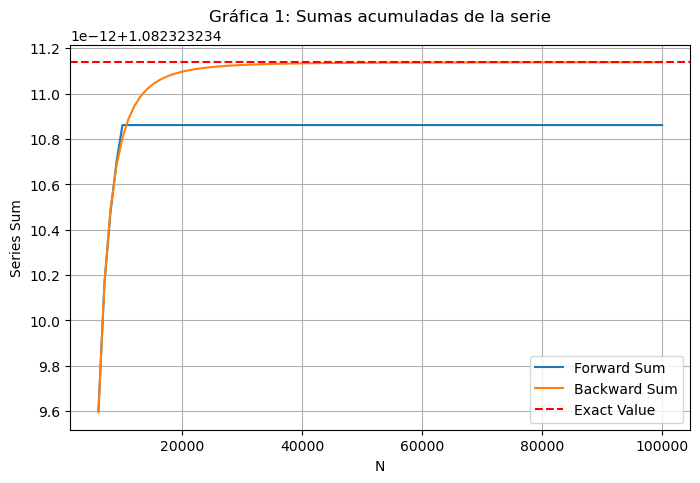

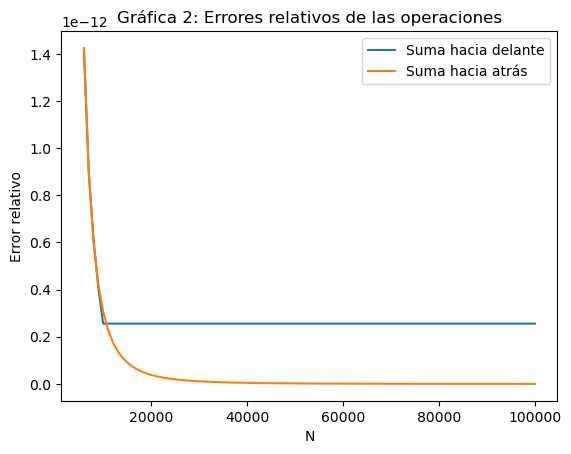

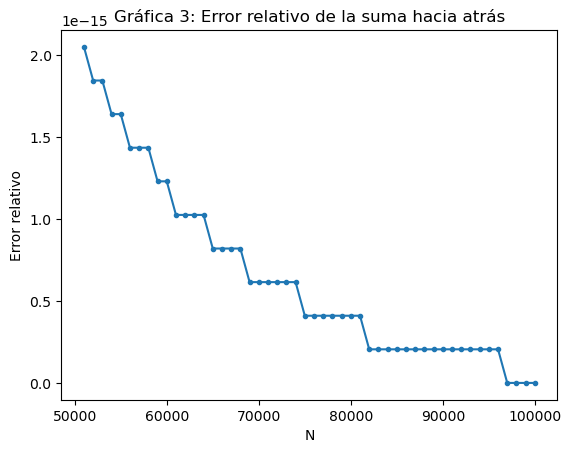

In [16]:
# YOUR CODE GOES HERE
N_values = np.arange(1000, 100001, 1000)

# Cálculo de resultados
forward_results = np.array([forward_sum(series_term, n) for n in N_values])
backward_results = np.array([backward_sum(series_term, n) for n in N_values])

# Calculo de errores
err_abs_forward = np.abs((S_exact-forward_results))
err_rel_forward = err_abs_forward/S_exact

err_abs_backward = np.abs((S_exact-backward_results))
err_rel_backward = err_abs_backward/S_exact


# Gráficas 
plt.figure(figsize=(8, 5))
plt.plot(N_values[5:], forward_results[5:], label='Forward Sum')
plt.plot(N_values[5:], backward_results[5:], label='Backward Sum')
plt.axhline(y=S_exact, color='red', linestyle='--', label='Exact Value')
plt.xlabel('N')
plt.ylabel('Series Sum')
plt.title('Gráfica 1: Sumas acumuladas de la serie')
plt.legend()
plt.grid(True)
plt.show()

plt.title("Gráfica 2: Errores relativos de las operaciones")
plt.xlabel("N")
plt.ylabel("Error relativo")
plt.plot(N_values[5:], err_rel_forward[5:], label='Suma hacia delante')
plt.plot(N_values[5:], err_rel_backward[5:], label='Suma hacia atrás')
plt.legend()
plt.show()

plt.clf()

plt.title("Gráfica 3: Error relativo de la suma hacia atrás")
plt.xlabel("N")
plt.ylabel("Error relativo")
plt.plot(N_values[-50:], err_rel_backward[-50:], marker=".")
plt.show()

__EXPLICACIÓN__

En ambas implementaciones, al aumentar N decrecen tanto el error absoluto como el relativo, pero sólo hasta cierto punto a partir del cual el ordenador no puede recoger más decimales.

En el caso de la implementación de la suma hacia delante, los errores absoluto y relativo más pequeños obtenidos son 2.768896e-13 y 2.55829e-13, respectivamente. El primer valor de $N$ que consigue estos resultados es 9741, todos los valores que lo suceden tienen la característica de ser lo suficientemente pequeños para que la variable que acumula el resultado no los pueda recoger. Esto se debe a que el punto de partida es el número 1, de tal manera que el último bit de la mantissa corresponde con el valor 2^-53, haciendo que todos los valores menores que este se pierdan. Según los siguientes cálculos se puede justificar que los valores de $N$ a partir de 9742 no suponen ninguna mejora.
$$
\frac{1}{N^4}< 2^{-53} ; N > 2^{13}\sqrt[4]{2} = 9741.98
$$

Por el contrario, con la implementación de la suma hacia atrás se consigue una aproximación que el ordenador considera perfecta; tanto el error absoluto como el error relativo llegan a ser cero, siendo 96519 el primer valor de $N$ que alcanza este resultado. Esta versión de la aproximación consigue mejores resultados que la anterior porque comienza con números pequeños, que al ir sumándose a otros no tan grandes, termina por alcanzar el resultado final sin haber perdido una gran cantidad de valores decimales durante el proceso.

La gráfica 1 da a entender que ambas implementaciones consiguen los mismos resultados; sin embargo, este no es el caso. En las gráficas se ha ignorado los primeros datos para realizar una gráfica más representativa. En esta se puede ver cómo la implementación de suma hacia atrás deja de disminuir el error, mientras que la otra implementación continúa mejorando los resultados. En la gráfica 3 se puede observar cómo se comporta esta última implementación.

---

### Exercise 6.

Consider the following code:

In [17]:
from scipy.integrate import quad
from scipy.stats import norm


mu = 1.35
sigma = 0.25
f  = lambda x: norm.pdf(x,mu,sigma); 

def mystery_function(alpha):
    x_inf = mu-alpha*sigma;
    x_sup = mu+alpha*sigma;
    return quad(f, x_inf, x_sup, epsabs=1.0e-10, epsrel=1.0e-10)

alpha = 2.0
print(mystery_function(alpha))

(0.9544997361036416, 1.8403548653972358e-11)


1. Explain what is being computed with this piece of code.
2. Does the value that is beign computed change with the values of $\mu$ and $\sigma$? 
3. Provide a mathematical derivation (use [latex within a markdown cell](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)) to explain what is observed.
4. Use the above derivation to compute the value of the integral for $\alpha = \infty$.
5. What is the smallest value of $\alpha$ that is needed to achieve a result numerically equivalent to the one obtained with $\alpha = \infty$ ?

<u>HINTS</u>: 
* Look for information on `quad`,`norm`. 
* You may need to modify the values of `epsabs` and / or `epsrel` to answer the last question.

In [18]:
alpha = np.inf
prob_inf, err_inf = mystery_function(alpha)
minus_err_inf = prob_inf-err_inf
print('Solución con np.inf')
print(f' Alfa: {alpha}\n Probabilidad: {prob_inf}\n Error absoluto:{err_inf}')

alpha = 2.0
prob = 0.0
while not prob >= 1.0:
    alpha += 0.1
    prob, err = mystery_function(alpha)

print('\nAproximación variando alpha')
print(f' Alfa: {alpha}\n Probabilidad: {prob}\n Error absoluto:{err}')


Solución con np.inf
 Alfa: inf
 Probabilidad: 1.0000000000000349
 Error absoluto:6.353878763887597e-11

Aproximación variando alpha
 Alfa: 8.299999999999986
 Probabilidad: 1.0000000000000002
 Error absoluto:1.7936950000654612e-11


__EXPLICACIÓN__

La función `f` representa una función densidad de probabilidad, en concreto, la distribución normal donde la variable `mu` es la media y `sigma` la desviación típica. 

La función implementada se encarga de calcular la probabilidad de que una variable aleatoria, que siga dicha función densidad, se encuentre entre los valores `x_inf` y `x_sup`, y para ello se realiza la integral definida mostrada a continuación. La variable `alpha` es proporcional al ancho de este márgen de valores. 

$$
P(\mu-\alpha\sigma \leq X \leq \mu+\alpha\sigma) =  \int_{\mu-\alpha\sigma}^{\mu+\alpha\sigma} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx
$$

El valor calculado por la función `mystery_function` no varía al cambiar la media o la desviación típica, esto se debe a que los límites inferior y superior de la integral varían de la misma manera que la función distribución de probabilidad.

Haciendo que alpha tome el valor de infinito con `np.inf` se consigue una probabilidad junto con un error absoluto en el que se incluye el valor 1, el valor esperado. El valor de alpha más pequeño que se aproxima al resultado anterior es 8.3.

---

### Exercise 7.
Execute the following code several times.

In [19]:
N = 4;
i = range(1, N+1)
i, j = np.meshgrid(i, i);
A = np.abs(i-j)
print(A)
v0 = np.random.randn(N)
MAX_ITER  = 50;
for i in range(MAX_ITER):
    v1 = A @ v0;
    squared_norm = np.dot(v1, v1)
    lamb =  squared_norm / np.dot(v0, v1)
    print(lamb)
    v0 = v1 / np.sqrt(squared_norm)

[[0 1 2 3]
 [1 0 1 2]
 [2 1 0 1]
 [3 2 1 0]]
-4.637252764507725
22.576468105557236
8.034101796493339
6.19929594300445
5.58615543842783
5.34263487503468
5.240245147661242
5.196208568342507
5.177086752617079
5.168749166798515
5.1651072254953965
5.163515138977348
5.1628189142263485
5.162514407118525
5.162381216413556
5.16232295743451
5.16229747404012
5.162286327141095
5.162281451273518
5.162279318473216
5.162278385544019
5.162277977462184
5.162277798959036
5.16227772087819
5.162277686724066
5.162277671784368
5.162277665249445
5.162277662390938
5.162277661140571
5.162277660593635
5.162277660354395
5.162277660249746
5.162277660203971
5.162277660183947
5.162277660175189
5.162277660171358
5.162277660169682
5.162277660168949
5.1622776601686295
5.162277660168488
5.162277660168427
5.1622776601683995
5.162277660168389
5.1622776601683835
5.162277660168381
5.162277660168381
5.16227766016838
5.16227766016838
5.162277660168379
5.16227766016838


Provide an explanation of what the code does and of the results observed.

<u> HINT </u>:
Investigate the functionality of the numpy function `numpy.linalg.eig`.

__EXPLICACIÓN__

El código de este ejercicio calcula un autovalor aleatorio de la matriz $A$. Para ello se parte de un vector aleatorio $v0$ que es multiplicado por la matriz $A$ multiples veces. Con cada multiplicación ($A v0$) el vector resultante ($v1$) se acerca más y más a la dirección de uno de los autovectores de dicha matriz. Tras cada multiplicación se normaliza el vector para que tenga módulo uno, así evitando tratar con vectores muy grandes. En cada iteración del bucle se aproxima también un autovalor de la matriz $A$, realizando la división entre el producto escalar de $v1$ con sí mismo entre el producto escalar de $v0$ y $v1$, o lo que es lo mismo, calcular la proporción en la que ha crecido (o disminuido) el vector, es decir, el autovalor $\lambda$ relacionado con el autovector $v1$.

---

####### YOUR EXPLANATION GOES HERE (markdown)

### Exercise 8.

1. Explain how can the eigenvectors and eigenvalues of a square matrix be used to compute its exponential.
2. Making use of the function `numpy.linalg.eig` compute the results of exponentiating Toeplitz' matrix
$$
A = \left(
\begin{array}{cccc}
0 & 1 & 2 & 3 \\
1 & 0 & 1 & 2 \\
2 & 1 & 0 & 1 \\
3 & 2 & 1 & 0 
\end{array} 
\right).
$$
3. Compare the results with those obtained with the scipy function `scipy.linalg.expm`

In [20]:
a = [[0, 1, 2, 3],
     [1, 0, 1, 2],
     [2, 1, 0, 1],
     [3, 2, 1, 0]]

# Compute the matrix eigenvalues and eigenvectors
eigenvalues, s_matrix = np.linalg.eig(a)

# Since 'a' is a matrix of 4x4 and it has 4 distinct eigenvalues
# 'a' it is diagonizable and its exponential can be computed fairly easy
s_inverse = np.linalg.inv(s_matrix)

diag_exp = np.diag(np.exp(eigenvalues))

a_exp = s_matrix @ diag_exp @ s_inverse
scipy_result = sp.linalg.expm(a)

print(f'Matriz resultante:\n{a_exp}')
print('Error absoluto')
print(np.abs(scipy_result - a_exp))
print('Error relativo')
print(np.abs((scipy_result - a_exp) / scipy_result))

Matriz resultante:
[[57.54897396 41.23414727 41.41932638 57.43936799]
 [41.23414727 30.18299519 29.70303099 41.41932638]
 [41.41932638 29.70303099 30.18299519 41.23414727]
 [57.43936799 41.41932638 41.23414727 57.54897396]]
Error absoluto
[[2.70006240e-13 1.91846539e-13 2.13162821e-13 2.91322522e-13]
 [1.56319402e-13 1.24344979e-13 1.27897692e-13 1.84741111e-13]
 [1.56319402e-13 1.13686838e-13 1.20792265e-13 1.56319402e-13]
 [2.34479103e-13 1.84741111e-13 1.77635684e-13 2.62900812e-13]]
Error relativo
[[4.69176461e-15 4.65261322e-15 5.14645793e-15 5.07182673e-15]
 [3.79101818e-15 4.11970310e-15 4.30588018e-15 4.46026354e-15]
 [3.77406915e-15 3.82744905e-15 4.00199729e-15 3.79101818e-15]
 [4.08220200e-15 4.46026354e-15 4.30797520e-15 4.56829712e-15]]


__EXPLICACIÓN__

1. Cálculo de la exponencial de la matriz A.

    El cálculo de la exponencial de una matriz cuadrada es relativamente sencillo mediante el uso de autovalores y autovectores en el caso de que dicha matriz sea diagonalizable.

    Por suerte para nosotros la matriz de Toeplitz es diagonalizable. Esto se confirma puesto que es una matriz de 4x4 y tiene 4 autovectores distintos.

    1. Calculamos la matriz S cuyas columnas son los autovecores (v1, v2, v3 y v4) de A: 

    $$
    S = \left(
    \begin{array}{cccc}
    v1 & v2 & v3 & v4 
    \end{array} 
    \right).
    $$

    2. Mediante S, su inversa y los autovalores (lambda1, lambda2, lambda3 y lambda4), se puede calcular el exponencial de A de la siguiente manera:

    $$
    e^A = S \left(
    \begin{array}{cccc}
    e^{\lambda_{1}} & 0 & 0 & 0 \\
    0 & e^{\lambda_{2}} & 0 & 0 \\
    0 & 0 & e^{\lambda_{3}} & 0 \\
    0 & 0 & 0 & e^{\lambda_{4}} 
    \end{array} 
    \right) S^{-1}
    $$


2. Comparación de resultados.

    Siguiendo el algoritmo descrito en el apartado anterior y sp.linalg.expm() se obtiene resultados bastante similares.

---